## Notebook Structure
- **Dependencies**
- **Concatenation**
- **KPI Functions**
    1. *Total Comments and Reviews*
    2. *Distribution of Comments and Reviews by Platform*
    3. *Sentiment/Star Rating Distribution*
    4. *Distribution of Positive and Negative Topics*
    5. *Negative and Positive topics for Low Rating and High Rating Reviews (respectively)*
    6. *Positive and Negative topics for Low Rating and High Rating Reviews (respectively)*
    7. *Primary Positive Aspect for Positive Topic (Machine Performance)*
    8. *Primary Negative Aspect for Negative Topic (Machine Performance)*
    9. *Cross-category matrix for matching responses*

# Dependencies

In [13]:
%%capture
!pip install -r requirements.txt

In [14]:
# Third-party library imports
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Set the data folder
is_local = True # Set to False if running on Google Colab

if is_local:
    data_folder = 'data/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    data_folder = '/content/drive/MyDrive/ADSP/data/'

# Concatenation

In [16]:
# Load data
elaborated_comments_df = pd.read_csv(data_folder+'elaborated_comments.csv', sep='\t')
elaborated_reviews_df = pd.read_csv(data_folder+'elaborated_reviews.csv', sep='\t')

In [17]:
# Filder data model="tinyeco"
elaborated_comments_df = elaborated_comments_df[elaborated_comments_df['model'] == 'tinyeco']
elaborated_reviews_df = elaborated_reviews_df[elaborated_reviews_df['model'] == 'tinyeco']

In [18]:
def convert_to_datetime(value):
    """
    Converts a value to a datetime object if it's a string.
    Attempts multiple formats before returning NaT for invalid cases.
    """
    if pd.isna(value):
      return pd.NaT

    if isinstance(value, str):
      value = value.split('T')[0]
      date_formats = ['%Y-%m-%d', '%m/%d/%Y']
      for fmt in date_formats:
          try:
              return pd.to_datetime(value, format=fmt)
          except ValueError:
              continue
      print(f"Warning: Could not convert '{value}' to datetime. Returning NaN.")
      return pd.NaT

    return value

# Rename columns for consistency
elaborated_comments_df = elaborated_comments_df.rename(columns={
    'commentTimeStamp': 'feedbackDate',
    'Media type': 'feedbackPlatform'
})

elaborated_reviews_df = elaborated_reviews_df.rename(columns={
    'reviewDate': 'feedbackDate',
    'channel': 'feedbackPlatform'
})

# Convert 'feedbackDate' to datetime format
elaborated_comments_df['feedbackDate'] = elaborated_comments_df['feedbackDate'].apply(convert_to_datetime)
elaborated_reviews_df['feedbackDate'] = elaborated_reviews_df['feedbackDate'].apply(convert_to_datetime)

# Add missing columns for consistency
elaborated_comments_df['feedbackRating'] = np.nan
elaborated_reviews_df['isComment'] = False
elaborated_reviews_df['sentiment'] = elaborated_reviews_df['feedbackRating'].map({
    1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'
})


# Define common columns for merging datasets
common_columns = [
    'text', 'feedbackDate', 'feedbackPlatform', 'isComment',
    'positiveTopicClass', 'negativeTopicClass',
    'primaryPositiveAspect', 'primaryNegativeAspect', 'sentiment', 'feedbackRating'
]

# Concatenate both datasets into a unified DataFrame
combined_df = pd.concat(
    [elaborated_comments_df[common_columns], elaborated_reviews_df[common_columns]],
    ignore_index=True
)

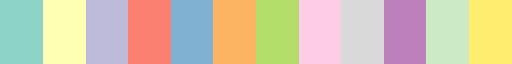

In [19]:
colors = cm.Set3.colors
display(cm.Set3)

# KPI Functions

## Total Comments and Reviews

In [20]:
# Analysis of the number of comments and reviews for a specific product.

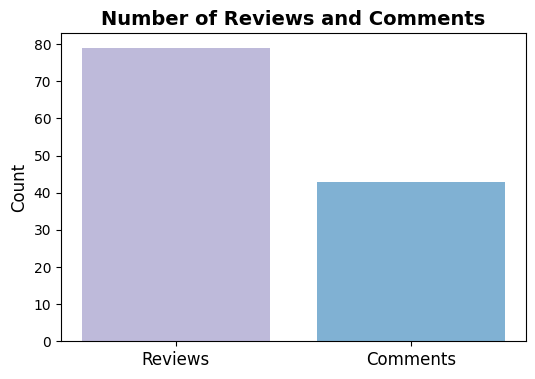

In [21]:
# Plot: Number of reviews and comments
plt.figure(figsize=(6, 4))
counts = combined_df['isComment'].value_counts()
plt.bar(['Reviews', 'Comments'], counts, color=[colors[2], colors[4]])
plt.title('Number of Reviews and Comments',fontweight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Distribution of Comments and Reviews by Platform

In [22]:
# Visualization of the distribution of comments and reviews by platform for a specific product.

<Figure size 1000x500 with 0 Axes>

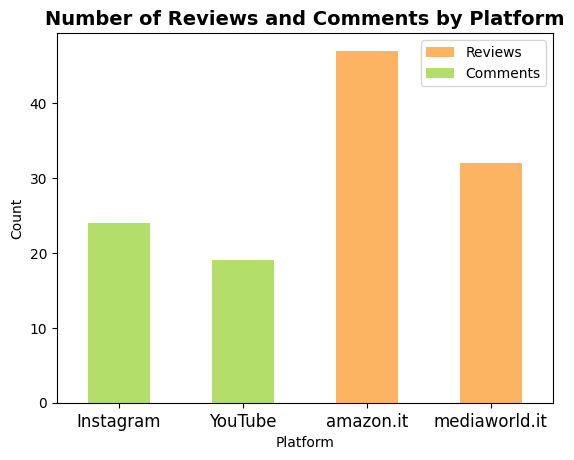

In [23]:
# Plot: Distribution of reviews and comments by platform
plt.figure(figsize=(10, 5))
platform_counts = combined_df.groupby(['feedbackPlatform', 'isComment']).size().unstack()
platform_counts.plot(kind='bar', stacked=True, color=[colors[5], colors[6]])
plt.title('Number of Reviews and Comments by Platform',fontweight='bold', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(['Reviews', 'Comments'])
plt.xticks(rotation=0)
plt.xticks(fontsize=12)
plt.show()

## Sentiment/Star Rating Distribution

In [24]:
# Analysis of sentiment distribution and the average star rating for a specific product.

/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/2491713084.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12)
/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/2491713084.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12)


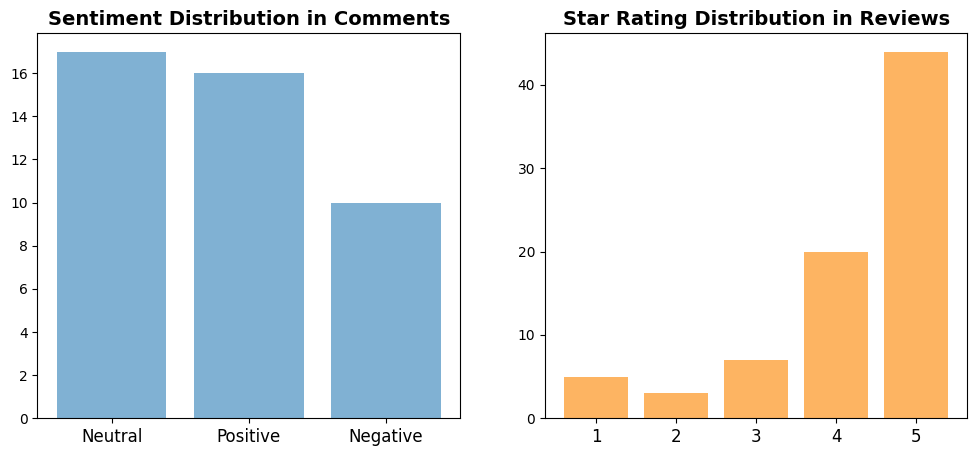

In [25]:
# Sentiment and rating distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comments_sentiment_counts = elaborated_comments_df['sentiment'].value_counts()
reviews_rating_counts = elaborated_reviews_df['feedbackRating'].value_counts()

axes[0].bar(comments_sentiment_counts.index, comments_sentiment_counts.values, color=colors[4])
axes[0].set_title('Sentiment Distribution in Comments',fontweight='bold', fontsize=14)
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize=12)


axes[1].bar(reviews_rating_counts.index, reviews_rating_counts.values, color=colors[5])
axes[1].set_title('Star Rating Distribution in Reviews',fontweight='bold', fontsize=14)
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize=12)
plt.show()

## Distribution of Positive and Negative Topics

In [26]:
# Analysis of the distribution of positive and negative topics for a specific product.

/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/2595537441.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/2595537441.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)


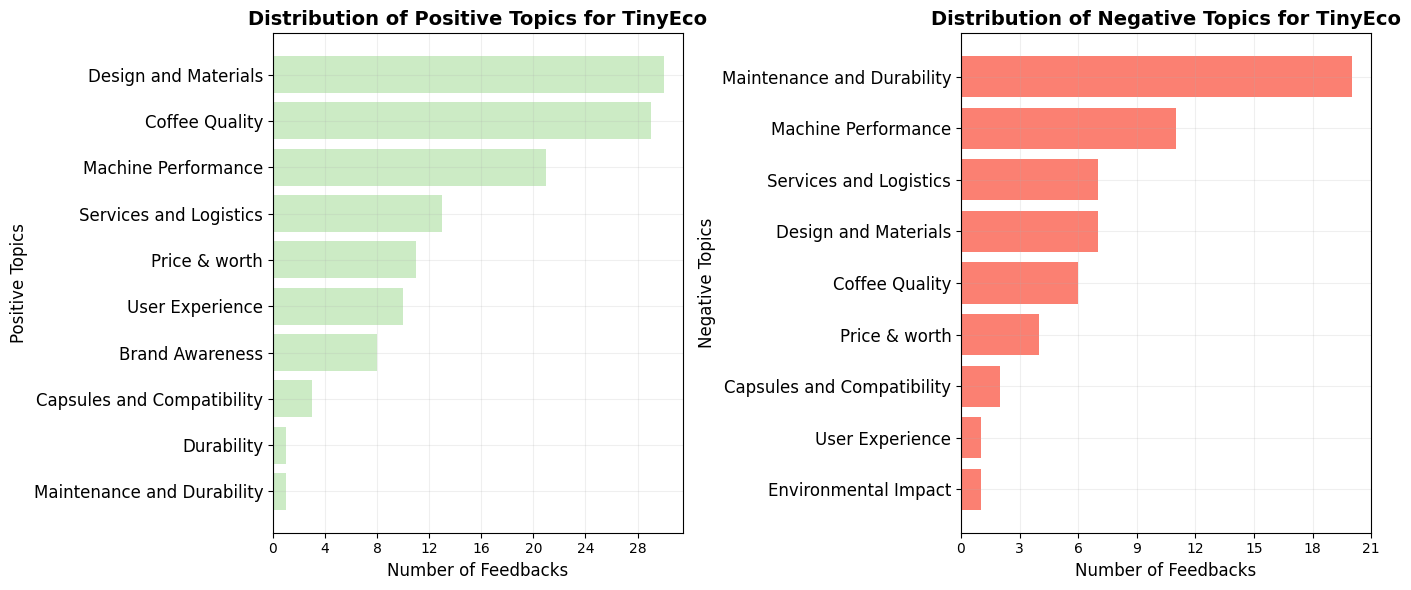

In [27]:
# Remove 'NONE' from topics for positive and negative feedbacks
positive_topics_filtered = combined_df['positiveTopicClass'].str.split(',').explode().str.strip()
positive_topics_filtered = positive_topics_filtered[positive_topics_filtered != 'NONE']

negative_topics_filtered = combined_df['negativeTopicClass'].str.split(',').explode().str.strip()
negative_topics_filtered = negative_topics_filtered[negative_topics_filtered != 'NONE']

# Count positive and negative topics
positive_topic_counts = positive_topics_filtered.value_counts().sort_values(ascending=True).reset_index()
negative_topic_counts = negative_topics_filtered.value_counts().sort_values(ascending=True).reset_index()

# Rename columns for clarity
positive_topic_counts.columns = ['Topic', 'Number of Feedbacks']
negative_topic_counts.columns = ['Topic', 'Number of Feedbacks']

# Create the plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Positive topics distribution
axes[0].barh(positive_topic_counts['Topic'], positive_topic_counts['Number of Feedbacks'], color=colors[-2])
axes[0].set_title('Distribution of Positive Topics for TinyEco', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Feedbacks', fontsize=12)
axes[0].set_ylabel('Positive Topics', fontsize=12)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
axes[0].grid(True, linestyle='-', alpha=0.2)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Second plot: Negative topics distribution
axes[1].barh(negative_topic_counts['Topic'], negative_topic_counts['Number of Feedbacks'], color=colors[3])
axes[1].set_title('Distribution of Negative Topics for TinyEco', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Feedbacks', fontsize=12)
axes[1].set_ylabel('Negative Topics', fontsize=12)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)
axes[1].grid(True, linestyle='-', alpha=0.2)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

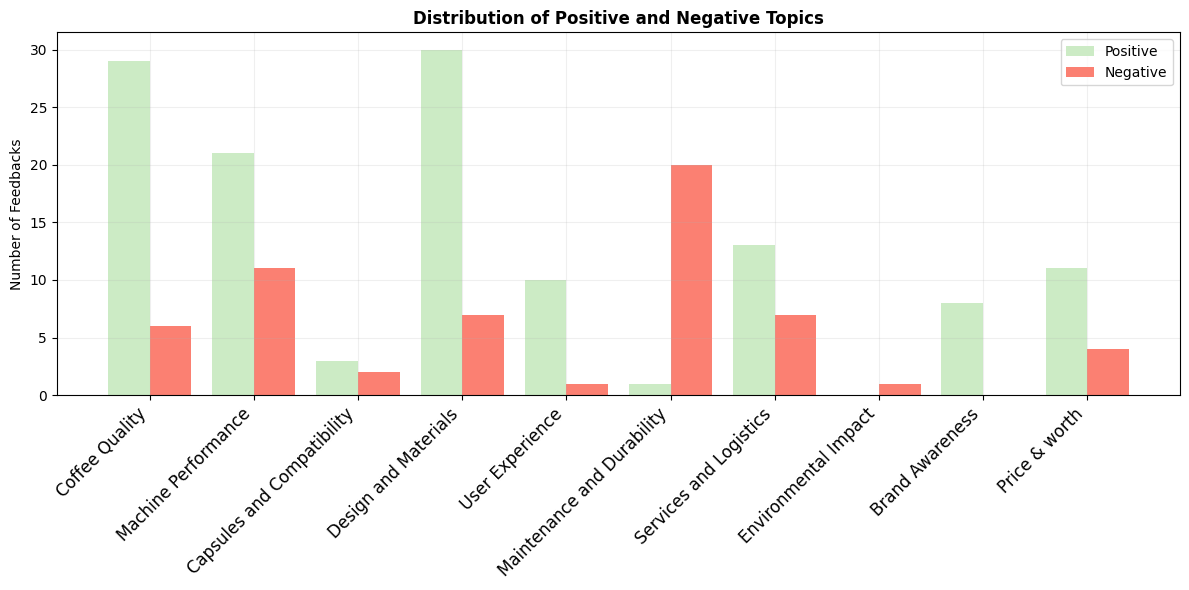

In [28]:
# List of topics
topics = [
    "Coffee Quality", "Machine Performance", "Capsules and Compatibility",
    "Design and Materials", "User Experience", "Maintenance and Durability",
    "Services and Logistics", "Environmental Impact", "Brand Awareness", "Price & worth"
]

# Remove 'NONE' from positive and negative topics
positive_topics_filtered = combined_df['positiveTopicClass'].str.split(',').explode().str.strip()
positive_topics_filtered = positive_topics_filtered[positive_topics_filtered != 'NONE']

negative_topics_filtered = combined_df['negativeTopicClass'].str.split(',').explode().str.strip()
negative_topics_filtered = negative_topics_filtered[negative_topics_filtered != 'NONE']

# Count occurrences of positive and negative topics
positive_counts = positive_topics_filtered.value_counts()
negative_counts = negative_topics_filtered.value_counts()

# Create a dataframe to merge the counts
topic_distribution = pd.DataFrame({
    'Positive': positive_counts,
    'Negative': negative_counts
}).fillna(0)  # Replace NaN with 0 if a topic is present in only one category

# Reorder the dataframe according to the predefined list of topics
topic_distribution = topic_distribution.reindex(topics, fill_value=0)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create the side-by-side bar chart
bar_width = 0.4
x = np.arange(len(topic_distribution.index))
ax.bar(x - bar_width/2, topic_distribution['Positive'], width=bar_width, label='Positive', color=colors[-2])
ax.bar(x + bar_width/2, topic_distribution['Negative'], width=bar_width, label='Negative', color=colors[3])

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(topic_distribution.index, rotation=45, ha='right')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('Number of Feedbacks')
ax.set_title('Distribution of Positive and Negative Topics',fontweight='bold')
ax.grid(True, linestyle='-', alpha=0.2)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Negative and Positive topics for Low Rating and High Rating Reviews (respectively)

/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/85536957.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/85536957.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)


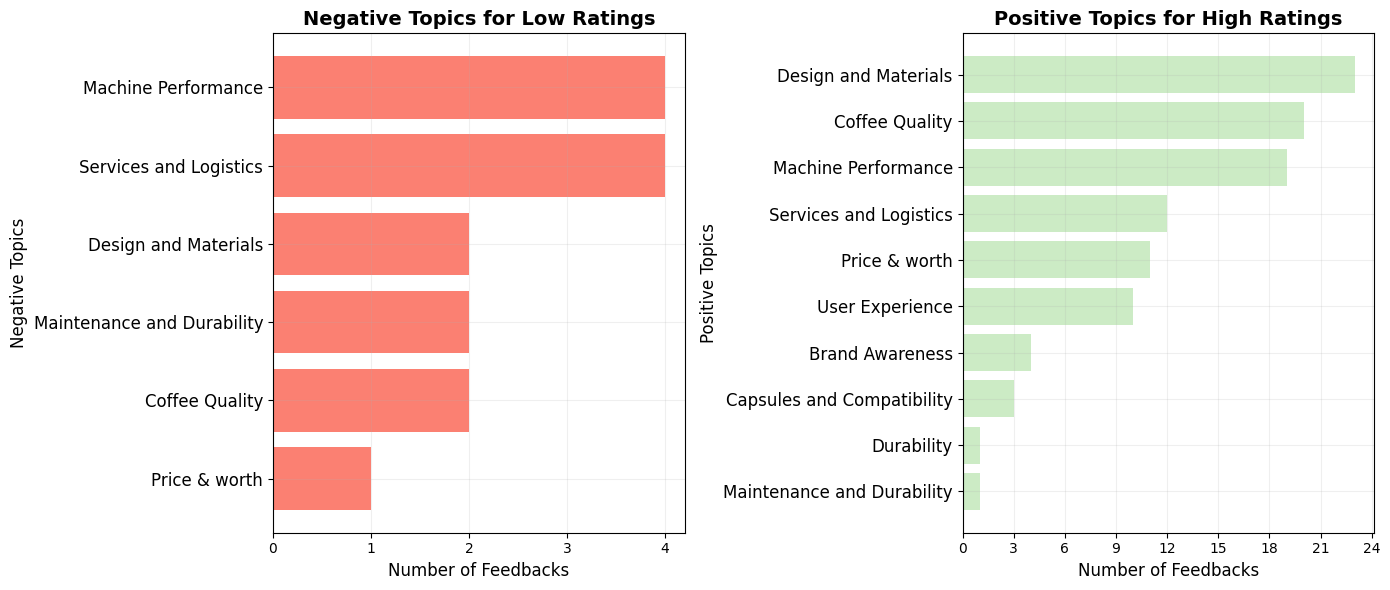

In [29]:
# Analyze topics based on feedback rating
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filtra solo le recensioni (escludi i commenti)
low_ratings = combined_df[(combined_df['isComment'] == False) &
                          (combined_df['feedbackRating'].isin([1, 2])) &
                          (combined_df['negativeTopicClass'] != 'NONE')]

high_ratings = combined_df[(combined_df['isComment'] == False) &
                           (combined_df['feedbackRating'].isin([4, 5])) &
                           (combined_df['positiveTopicClass'] != 'NONE')]

# Processa i topic
def process_topics(df, topic_column):
    return df[topic_column].str.split(',').explode().str.strip().value_counts().sort_values(ascending=True)

# Calcola i conteggi
low_neg = process_topics(low_ratings, 'negativeTopicClass')
high_pos = process_topics(high_ratings, 'positiveTopicClass')

# Plot negative topics for low ratings
axes[0].barh(low_neg.index, low_neg.values, color=colors[3])
axes[0].set_title('Negative Topics for Low Ratings', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Feedbacks', fontsize=12)
axes[0].set_ylabel('Negative Topics', fontsize=12)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
axes[0].grid(True, linestyle='-', alpha=0.2)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Plot positive topics for high ratings
axes[1].barh(high_pos.index, high_pos.values, color=colors[-2])
axes[1].set_title('Positive Topics for High Ratings', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Feedbacks', fontsize=12)
axes[1].set_ylabel('Positive Topics', fontsize=12)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)
axes[1].grid(True, linestyle='-', alpha=0.2)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Apply tight layout
plt.tight_layout()
plt.show()


## Positive and Negative topics for Low Rating and High Rating Reviews (respectively)

/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/3836917838.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_46998/3836917838.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)


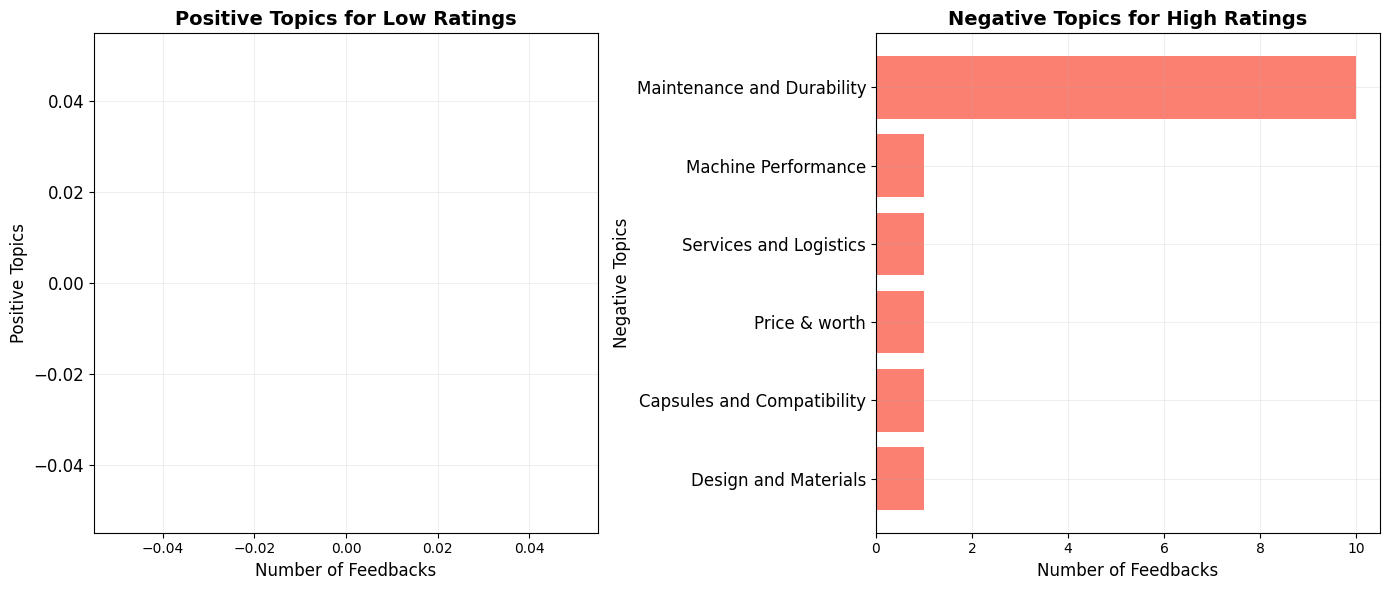

In [30]:
# Analyze reversed topic associations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filtra solo le recensioni (escludi i commenti)
low_ratings = combined_df[(combined_df['isComment'] == False) &
                          (combined_df['feedbackRating'].isin([1, 2])) &
                          (combined_df['positiveTopicClass'] != 'NONE')]

high_ratings = combined_df[(combined_df['isComment'] == False) &
                           (combined_df['feedbackRating'].isin([4, 5])) &
                           (combined_df['negativeTopicClass'] != 'NONE')]

# Processa i topic
def process_topics(df, topic_column):
    return df[topic_column].str.split(',').explode().str.strip().value_counts().sort_values(ascending=True)

# Calcola i conteggi
low_pos = process_topics(low_ratings, 'positiveTopicClass')
high_neg = process_topics(high_ratings , 'negativeTopicClass')

# Plot positive topics for low ratings
axes[0].barh(low_pos.index, low_pos.values, color=colors[-2])
axes[0].set_title('Positive Topics for Low Ratings', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Feedbacks', fontsize=12)
axes[0].set_ylabel('Positive Topics', fontsize=12)
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12)
axes[0].grid(True, linestyle='-', alpha=0.2)

# Plot negative topics for high ratings
axes[1].barh(high_neg.index, high_neg.values, color=colors[3])
axes[1].set_title('Negative Topics for High Ratings', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Feedbacks', fontsize=12)
axes[1].set_ylabel('Negative Topics', fontsize=12)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12)
axes[1].grid(True, linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

## Primary Positive Aspect for Positive Topic (Machine Performance)

In [31]:
# Identification of the main positive aspects associated with positive feedback on the "Machine Performance" topic.

In [32]:
# Filter feedback that contains "Machine Performance" in the 'positiveTopicClass' column
positive_aspects = combined_df[combined_df['positiveTopicClass'].str.contains('Machine Performance', na=False)]

# Exclude rows where 'primaryPositiveAspect' is 'NONE'
positive_aspects = positive_aspects[positive_aspects['primaryPositiveAspect'] != 'NONE']

# Check if there are any valid positive aspects
if positive_aspects.empty:
    print("No feedback found for positive aspect 'Machine Performance'.")
else:
    # Find the most frequent positive aspect (mode) and print it
    primary_positive_aspect = positive_aspects['primaryPositiveAspect'].mode()

    if not primary_positive_aspect.empty:
        print(f"Primary Positive Aspect for Machine Performance: {primary_positive_aspect[0]}")
    else:
        print("No dominant positive aspect found for Machine Performance.")

Primary Positive Aspect for Machine Performance: Good coffee


## Primary Negative Aspect for Negative Topic (Machine Performance)

In [33]:
# Identification of the main negative aspects associated with negative feedback on the "Machine Performance" topic.

In [34]:
# Filter feedback that contains "Machine Performance" in the 'positiveTopicClass' column
positive_aspects = combined_df[combined_df['negativeTopicClass'].str.contains('Machine Performance', na=False)]

# Exclude rows where 'primaryPositiveAspect' is 'NONE'
positive_aspects = positive_aspects[positive_aspects['primaryNegativeAspect'] != 'NONE']

# Check if there are any valid positive aspects
if positive_aspects.empty:
    print("No feedback found for positive aspect 'Machine Performance'.")
else:
    # Find the most frequent positive aspect (mode) and print it
    primary_positive_aspect = positive_aspects['primaryPositiveAspect'].mode()

    if not primary_positive_aspect.empty:
        print(f"Primary Positive Aspect for Machine Performance: {primary_positive_aspect[0]}")
    else:
        print("No dominant positive aspect found for Machine Performance.")

No feedback found for positive aspect 'Machine Performance'.


## Cross-category matrix for matching responses

We create a cross-category matrix that counts how often two categories have matching responses. First, we separate the positive and negative responses, then generate individual matrices for each. Finally, we combine them to visualize the overall patterns and overlaps between categories. The result is shown as a heatmap.

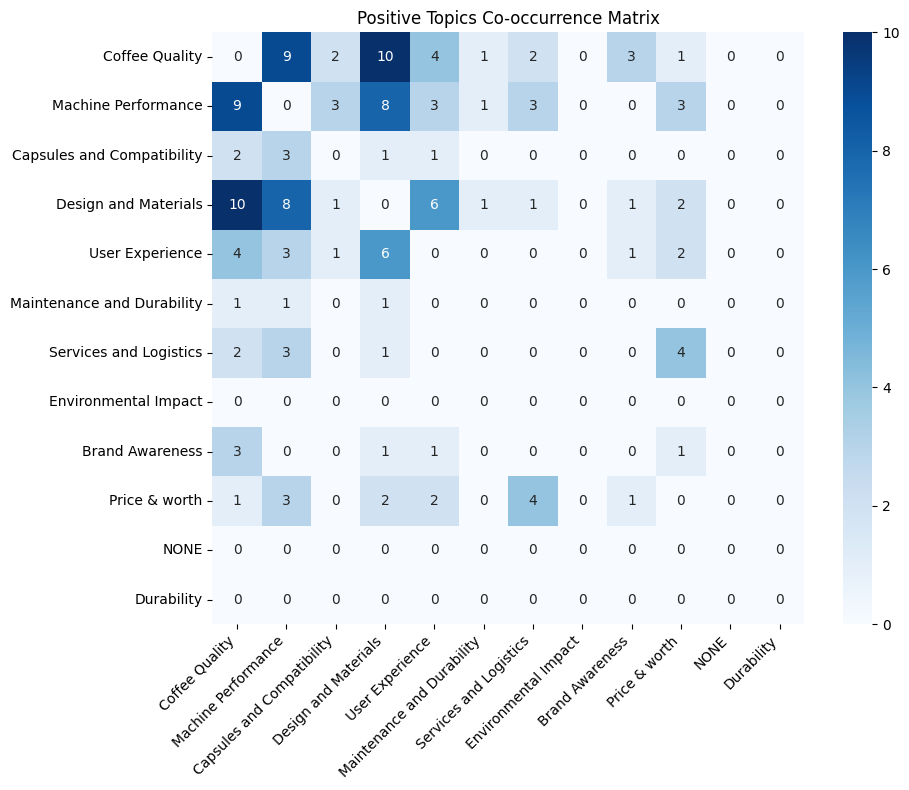

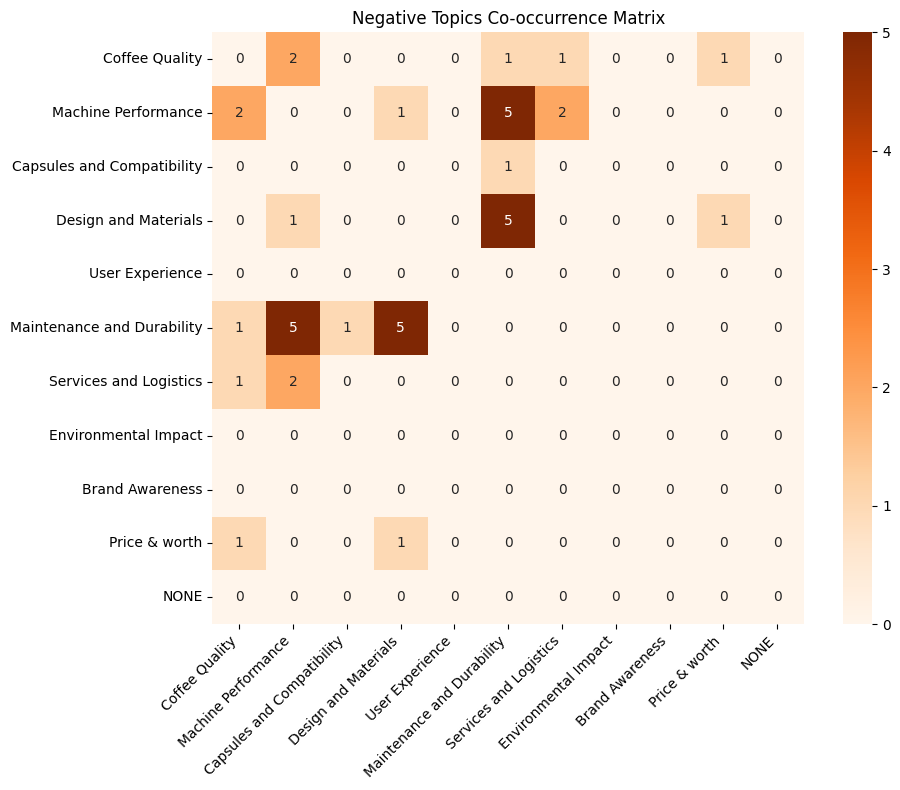

In [35]:
topics = [
    "Coffee Quality", "Machine Performance", "Capsules and Compatibility",
    "Design and Materials", "User Experience", "Maintenance and Durability",
    "Services and Logistics", "Environmental Impact", "Brand Awareness", "Price & worth"
]

def create_cooccurrence_matrix(df, topic_column):
    """
    Creates a co-occurrence matrix based on a topic column.
    Each row represents a feedback instance, and the presence of topics is marked with 1.
    The diagonal of the matrix is set to zero to exclude self-co-occurrence.
    """

    # Creare una matrice binaria per i topic
    binary_matrix = pd.DataFrame(0, index=df.index, columns=topics)

    for index, row in df.iterrows():
        if pd.notna(row[topic_column]):
            active_topics = row[topic_column].split(",")
            active_topics = [t.strip() for t in active_topics]
            binary_matrix.loc[index, active_topics] = 1

    # Creare la matrice di co-occorrenza
    cooccurrence_matrix = binary_matrix.T.dot(binary_matrix)

    # Impostare la diagonale a zero
    np.fill_diagonal(cooccurrence_matrix.values, 0)

    # Sostituire i NaN con 0
    cooccurrence_matrix = cooccurrence_matrix.fillna(0)

    # Convertire i valori in interi
    cooccurrence_matrix = cooccurrence_matrix.astype(int)

    return cooccurrence_matrix

def plot_heatmap(matrix, title, cmap="viridis"):
    """Crea una heatmap per una matrice di co-occorrenza."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap=cmap, cbar=True, square=True)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Creare matrici di co-occorrenza per i topic positivi e negativi
positive_matrix = create_cooccurrence_matrix(combined_df, "positiveTopicClass")
negative_matrix = create_cooccurrence_matrix(combined_df, "negativeTopicClass")

# Plot delle matrici con palette cromatica personalizzata
plot_heatmap(positive_matrix, "Positive Topics Co-occurrence Matrix", cmap="Blues")
plot_heatmap(negative_matrix, "Negative Topics Co-occurrence Matrix", cmap="Oranges")

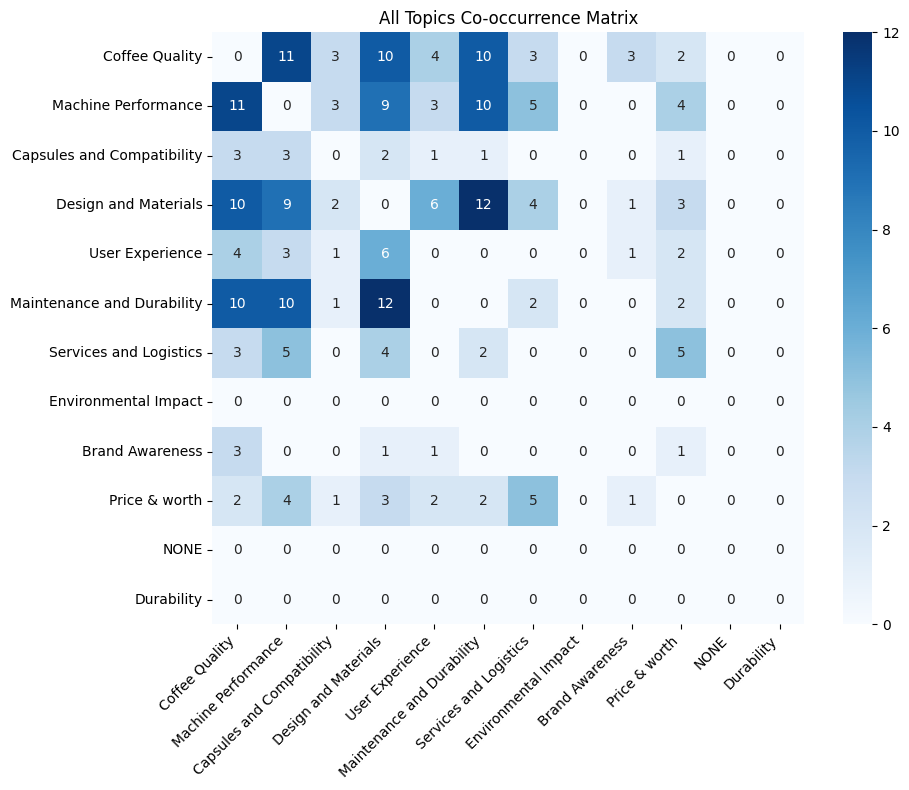

In [36]:
def create_full_cooccurrence_matrix(df, positive_column, negative_column):
    """
    Creates a co-occurrence matrix based on both positive and negative topic columns.
    Each row represents a feedback instance, and the presence of topics is marked with 1.
    The diagonal of the matrix is set to zero to exclude self-co-occurrence.
    """

    # Creare una matrice binaria per i topic positivi e negativi
    binary_matrix = pd.DataFrame(0, index=df.index, columns=topics)

    for index, row in df.iterrows():
        active_topics = set()

        # Aggiungere i topic positivi
        if pd.notna(row[positive_column]):
            positive_topics = row[positive_column].split(",")
            active_topics.update([t.strip() for t in positive_topics])

        # Aggiungere i topic negativi
        if pd.notna(row[negative_column]):
            negative_topics = row[negative_column].split(",")
            active_topics.update([t.strip() for t in negative_topics])

        # Aggiornare la matrice binaria
        binary_matrix.loc[index, list(active_topics)] = 1

    # Creare la matrice di co-occorrenza
    cooccurrence_matrix = binary_matrix.T.dot(binary_matrix)

    # Impostare la diagonale a zero
    np.fill_diagonal(cooccurrence_matrix.values, 0)

    # Sostituire i NaN con 0
    cooccurrence_matrix = cooccurrence_matrix.fillna(0)

    # Convertire i valori in interi
    cooccurrence_matrix = cooccurrence_matrix.astype(int)

    return cooccurrence_matrix

def plot_heatmap(matrix, title, cmap="viridis"):
    """Crea una heatmap per una matrice di co-occorrenza."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap=cmap, cbar=True, square=True)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Creare la matrice di co-occorrenza per tutti i dati nel dataframe combined_df
full_matrix = create_full_cooccurrence_matrix(combined_df, "positiveTopicClass", "negativeTopicClass")

# Plot della matrice con palette cromatica personalizzata
plot_heatmap(full_matrix, "All Topics Co-occurrence Matrix", cmap="Blues")